🔥 Final XGBoost Model Accuracy: 0.80


/Users/mk/nba-betting-ai/nba-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [01:06:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


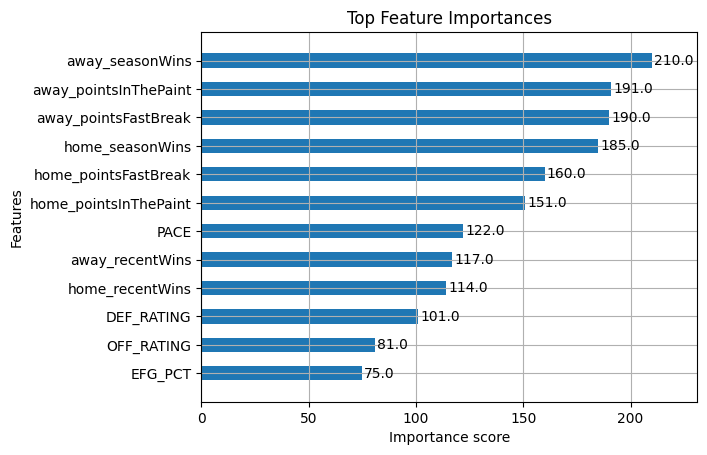

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier, plot_importance
import matplotlib.pyplot as plt

# Load your preprocessed game data (the one with merges + cleaned)
games_df = pd.read_csv("data/your_final_games_data.csv")

# 🧠 Pick your best features (you can tweak this!)
features = [
    'home_seasonWins', 'away_seasonWins',
    'home_pointsFastBreak', 'away_pointsFastBreak',
    'home_pointsInThePaint', 'away_pointsInThePaint',
    'home_recentWins', 'away_recentWins',
    'OFF_RATING', 'OFF_RATING_away',
    'DEF_RATING', 'DEF_RATING_away',
    'PACE', 'PACE_away',
    'EFG_PCT', 'EFG_PCT_away'
]

# 🎯 Target variable: 1 if home team won, 0 if not
target = 'home_win'

# 🧼 Clean any missing data (just in case)
games_df = games_df.dropna(subset=features + [target])

# ✅ Feature matrix and target vector
X = games_df[features]
y = games_df[target]

# 📊 Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🚀 Train the model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# 🔮 Make predictions and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"🔥 Final XGBoost Model Accuracy: {accuracy:.2f}")

# 📊 Visualize feature importance
plot_importance(model, max_num_features=15, height=0.5)
plt.title("Top Feature Importances")
plt.show()
